In [67]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
 
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1) 
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
  
    def forward(self, x):
    
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x


In [69]:
import torch 
import xlrd
from sklearn.preprocessing import StandardScaler
import numpy as np

N, D_in, H1, H2, D_out = 50, 7, 21, 9, 3
model = Net(D_in, H1, H2, D_out)

model.load_state_dict(torch.load("C:/Users/Gabriel/Documents/Python/ANNkinetic7.pt"))
model.eval()
book = xlrd.open_workbook('kinetic data for standardisation.xlsx')
sheet = book.sheet_by_name('Sheet1')
data4 = [[sheet.cell_value(r, c)
         for c in range(0,7)] for r in range(0,300)]
data5 = [[sheet.cell_value(r, c)
         for c in range(4,7)] for r in range(0,300)]


scaler = StandardScaler()
scaler2 = StandardScaler()


In [70]:

book = xlrd.open_workbook('kinetic test data for new ANN.xlsx')
sheet = book.sheet_by_name('Sheet1')

data = [[sheet.cell_value(r, c)
         for c in range(0,7)] for r in range(315,340)]
data3 = [[sheet.cell_value(r, c)
         for c in range(0,3)] for r in range(316,341)]



scaler.fit(data4)
scaler2.fit(data5)

n = np.array(data)
q = torch.tensor(n[0:1,:])
standardised_data = scaler.transform(data)
x = torch.tensor(standardised_data[0:1,:])
v = torch.tensor(data3)

results=[]
for i in range(25):
     with torch.no_grad():
        dx_dt_pred = model(x.float())
        predictions= np.array(dx_dt_pred)
        descaled_predictions = scaler2.inverse_transform(predictions)
        usable_predictions = torch.tensor(descaled_predictions)
        q[:, 0:3]  = (usable_predictions*12) + q[:, 0:3]
        q[:,4:7] = usable_predictions
        np_x = np.array(q)
        results.append(np_x[:, 0:3])
        standardised_data3 = scaler.transform(np_x)
        x = torch.tensor(standardised_data3)

predictions_final = torch.tensor(results)  
x_plot = predictions_final.view(25, 3)



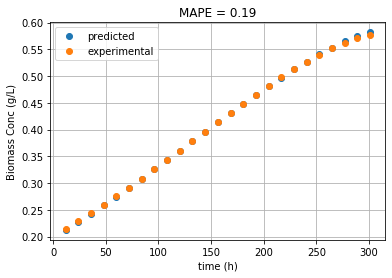

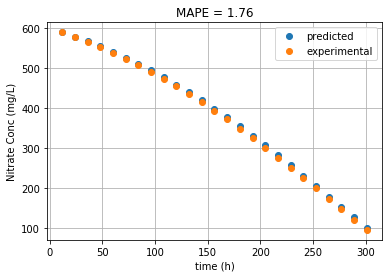

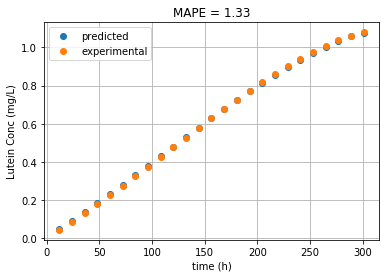

In [71]:
def MAPE(y_true, y_pred):
    MAPE_Total=0
    for i in range(len(y_pred)):
        MAPE = torch.abs((y_true[i:1+i,:]-y_pred[i:1+i,:])/y_true[i:1+i,:])
        MAPE_Total += (MAPE/len(y_pred))*100
    return MAPE_Total

import numpy as np
a = np.linspace(12,301,25)
v = torch.tensor(data3)
import matplotlib.pyplot as plt 
y1 = x_plot[:, 0:1] 
x1 = a
plt.plot(x1, y1,'o' ,label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, 'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Biomass Conc (g/L)')
loss = MAPE(v[:, 0:1],x_plot[:, 0:1])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


y1 = x_plot[:, 1:2] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
loss = MAPE(v[:, 1:2],x_plot[:, 1:2])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

y1 = x_plot[:, 2:3] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Lutein Conc (mg/L)')
loss = MAPE(v[:, 2:3],x_plot[:, 2:3])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


In [72]:
book = xlrd.open_workbook('kinetic test data for new ANN.xlsx')
sheet = book.sheet_by_name('Sheet1')

data = [[sheet.cell_value(r, c)
         for c in range(0,7)] for r in range(343,368)]

data3 = [[sheet.cell_value(r, c)
         for c in range(0,3)] for r in range(344,369)]

scaler.fit(data4)
scaler2.fit(data5)
n = np.array(data)
q= torch.tensor(n[0:1,:])
standardised_data = scaler.transform(data)
x = torch.tensor(standardised_data[0:1,:])
v = torch.tensor(data3)

results=[]
for i in range(25):
     with torch.no_grad():
        dx_dt_pred = model(x.float())
        predictions = np.array(dx_dt_pred)
        descaled_predictions = scaler2.inverse_transform(predictions)
        usable_predictions = torch.tensor(descaled_predictions)
        q[:, 0:3]  = (usable_predictions*12) + q[:, 0:3]
        q[:,4:7] = usable_predictions
        np_x = np.array(q)
        results.append(np_x[:, 0:3])
        standardised_data3 = scaler.transform(np_x)
        x = torch.tensor(standardised_data3)

predictions_final = torch.tensor(results)  
x_plot = predictions_final.view(25, 3)


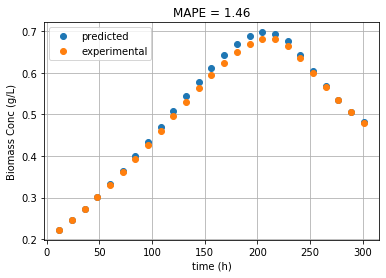

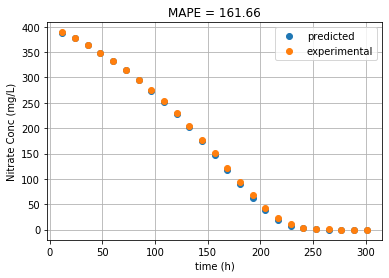

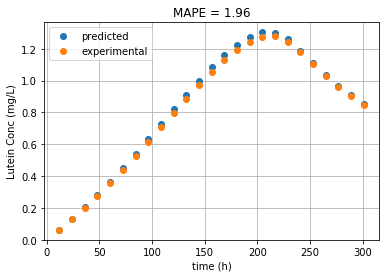

In [73]:
def MAPE(y_true, y_pred):
    MAPE_Total=0
    for i in range(len(y_pred)):
        MAPE = torch.abs((y_true[i:1+i,:]-y_pred[i:1+i,:])/y_true[i:1+i,:])
        MAPE_Total += (MAPE/len(y_pred))*100
    return MAPE_Total

import numpy as np
a = np.linspace(12,301,25)
v = torch.tensor(data3)
import matplotlib.pyplot as plt 
y1 = x_plot[:, 0:1] 
x1 = a
plt.plot(x1, y1,'o' ,label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, 'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Biomass Conc (g/L)')
loss = MAPE(v[:, 0:1],x_plot[:, 0:1])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


y1 = x_plot[:, 1:2] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
loss = MAPE(v[:, 1:2],x_plot[:, 1:2])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

y1 = x_plot[:, 2:3] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Lutein Conc (mg/L)')
loss = MAPE(v[:, 2:3],x_plot[:, 2:3])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

In [74]:
book = xlrd.open_workbook('kinetic test data for new ANN.xlsx')
sheet = book.sheet_by_name('Sheet1')

data = [[sheet.cell_value(r, c)
         for c in range(0,7)] for r in range(371,396)]
data3 = [[sheet.cell_value(r, c)
         for c in range(0,3)] for r in range(372,397)]

scaler.fit(data4)
scaler2.fit(data5)
n = np.array(data)
q= torch.tensor(n[0:1,:])
standardised_data = scaler.transform(data)
x = torch.tensor(standardised_data[0:1,:])
v = torch.tensor(data3)

results=[]
for i in range(25):
     with torch.no_grad():
        dx_dt_pred = model(x.float())
        predictions= np.array(dx_dt_pred)
        descaled_predictions = scaler2.inverse_transform(predictions)
        usable_predictions = torch.tensor(descaled_predictions)
        q[:, 0:3]  = (usable_predictions*12) + q[:, 0:3]
        q[:,4:7] = usable_predictions
        np_x = np.array(q)
        results.append(np_x[:, 0:3])
        standardised_data3 = scaler.transform(np_x)
        x = torch.tensor(standardised_data3)

predictions_final = torch.tensor(results)  
x_plot = predictions_final.view(25, 3)

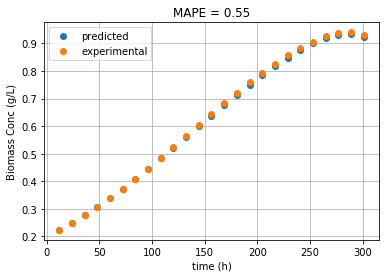

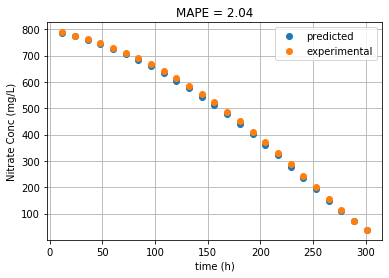

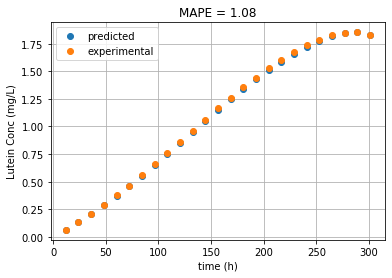

In [75]:
def MAPE(y_true, y_pred):
    MAPE_Total=0
    for i in range(len(y_pred)):
        MAPE = torch.abs((y_true[i:1+i,:]-y_pred[i:1+i,:])/y_true[i:1+i,:])
        MAPE_Total += (MAPE/len(y_pred))*100
    return MAPE_Total

import numpy as np
a = np.linspace(12,301,25)
v = torch.tensor(data3)
import matplotlib.pyplot as plt 
y1 = x_plot[:, 0:1] 
x1 = a
plt.plot(x1, y1,'o' ,label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, 'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Biomass Conc (g/L)')
loss = MAPE(v[:, 0:1],x_plot[:, 0:1])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


y1 = x_plot[:, 1:2] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
loss = MAPE(v[:, 1:2],x_plot[:, 1:2])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

y1 = x_plot[:, 2:3] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Lutein Conc (mg/L)')
loss = MAPE(v[:, 2:3],x_plot[:, 2:3])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

In [76]:
book = xlrd.open_workbook('kinetic test data for new ANN.xlsx')
sheet = book.sheet_by_name('Sheet1')

data = [[sheet.cell_value(r, c)
         for c in range(0,7)] for r in range(399,424)]
data3 = [[sheet.cell_value(r, c)
         for c in range(0,3)] for r in range(400,425)]

scaler.fit(data4)
scaler2.fit(data5)
n = np.array(data)
q= torch.tensor(n[0:1,:])
standardised_data = scaler.transform(data)
x = torch.tensor(standardised_data[0:1,:])
v = torch.tensor(data3)

results=[]
for i in range(25):
     with torch.no_grad():
        dx_dt_pred = model(x.float())
        predictions= np.array(dx_dt_pred)
        descaled_predictions = scaler2.inverse_transform(predictions)
        usable_predictions = torch.tensor(descaled_predictions)
        q[:, 0:3]  = (usable_predictions*12) + q[:, 0:3]
        q[:,4:7] = usable_predictions
        np_x = np.array(q)
        results.append(np_x[:, 0:3])
        standardised_data3 = scaler.transform(np_x)
        x = torch.tensor(standardised_data3)

predictions_final = torch.tensor(results)  
x_plot = predictions_final.view(25, 3)

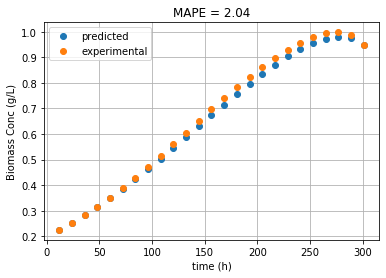

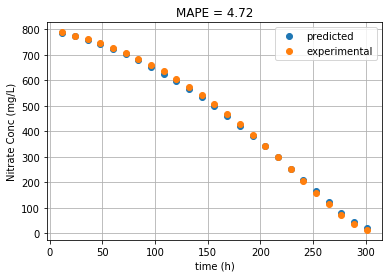

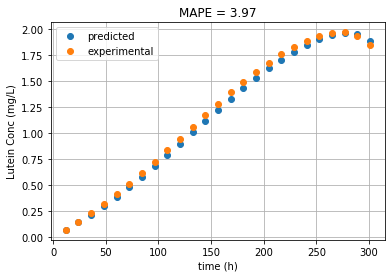

In [77]:
def MAPE(y_true, y_pred):
    MAPE_Total=0
    for i in range(len(y_pred)):
        MAPE = torch.abs((y_true[i:1+i,:]-y_pred[i:1+i,:])/y_true[i:1+i,:])
        MAPE_Total += (MAPE/len(y_pred))*100
    return MAPE_Total

import numpy as np
a = np.linspace(12,301,25)
v = torch.tensor(data3)
import matplotlib.pyplot as plt 
y1 = x_plot[:, 0:1] 
x1 = a
plt.plot(x1, y1,'o' ,label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, 'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Biomass Conc (g/L)')
loss = MAPE(v[:, 0:1],x_plot[:, 0:1])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


y1 = x_plot[:, 1:2] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
loss = MAPE(v[:, 1:2],x_plot[:, 1:2])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

y1 = x_plot[:, 2:3] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Lutein Conc (mg/L)')
loss = MAPE(v[:, 2:3],x_plot[:, 2:3])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 